<h1>HW5</h1>

# Question 1
### (Beta Distribution) Complete the following exercises 

### 1.1 

Create a function to calculate the probability density function (PDF) of  beta distribution:

\begin{equation*}
f(x;\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
\end{equation*}


* Function name: pdf_beta

* Input: $\alpha$, $\beta$, x

* Output: f(x;$\alpha$,$\beta$)

* Use SpecialFunctions.gamma() for the gamma function


In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])


   Resolving package versions...
    Updating `C:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks\Project.toml`
  [276daf66] + SpecialFunctions v2.5.0
  No Changes to `C:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks\Manifest.toml`


In [2]:
import SpecialFunctions
import Plots


In [3]:
using SpecialFunctions

function pdf_beta(alpha, beta, x)
    if x < 0 || x > 1
        return 0.0  # The beta distribution is only defined for 0 <= x <= 1
    end
    coeff = gamma(alpha + beta) / (gamma(alpha) * gamma(beta))
    return coeff * x^(alpha - 1) * (1 - x)^(beta - 1)
end

# Example usage
pdf_beta(2, 3, 0.5)


1.5

### 1.2

1. Create a x from 0 to 1 with increment of 0.001 as the probability of event. 
2. Create $\alpha$ = 0.5 and $\beta$ = 0.5
3. Calculate the pdf of the beta distribution over x 
4. Plot pdf vs. x
5. What is the shape of the beta distribution

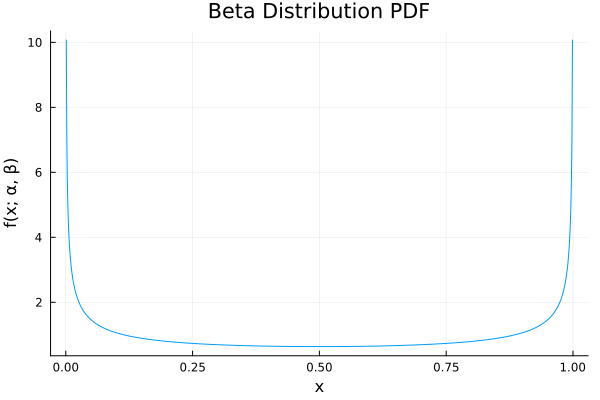

In [6]:
using Plots
# Create x from 0 to 1 with increment of 0.001
x = 0:0.001:1

# Define alpha and beta
alpha = 0.5
beta = 0.5

# Compute the pdf values
y = [pdf_beta(alpha, beta, xi) for xi in x]

# Plot pdf vs. x
plot(x, y, title="Beta Distribution PDF", xlabel="x", ylabel="f(x; α, β)", legend=false)


The beta distribution is U-shaped.

### 1.3

1. Change $\alpha$ = 1 and $\beta$ = 1
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

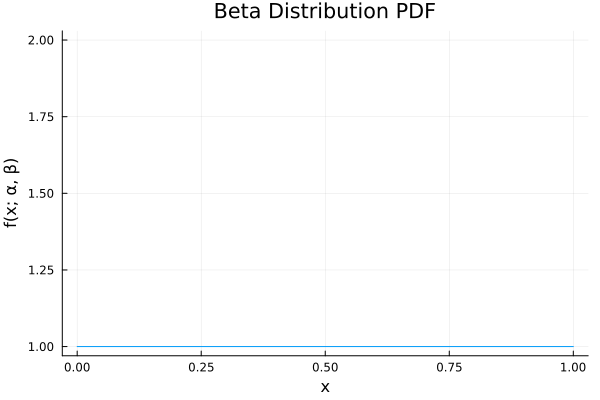

In [7]:
using Plots
# Create x from 0 to 1 with increment of 0.001
x = 0:0.001:1

# Define alpha and beta
alpha = 1
beta = 1

# Compute the pdf values
y = [pdf_beta(alpha, beta, xi) for xi in x]

# Plot pdf vs. x
plot(x, y, title="Beta Distribution PDF", xlabel="x", ylabel="f(x; α, β)", legend=false)


This plot exhibits a line and no changes in value from 0 to 1.00.

### 1.4

1. Change $\alpha$ = 5 and $\beta$ = 5
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

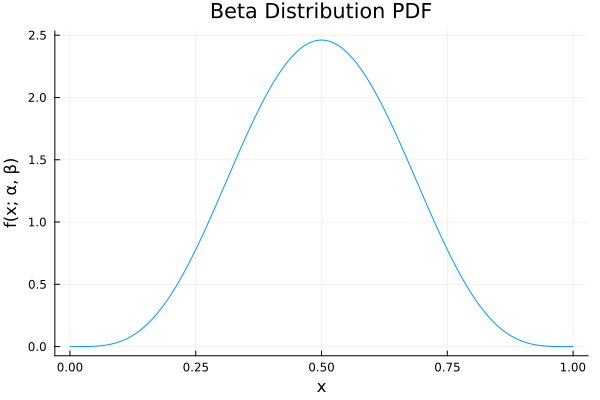

In [8]:
using Plots
# Create x from 0 to 1 with increment of 0.001
x = 0:0.001:1

# Define alpha and beta
alpha = 5
beta = 5

# Compute the pdf values
y = [pdf_beta(alpha, beta, xi) for xi in x]

# Plot pdf vs. x
plot(x, y, title="Beta Distribution PDF", xlabel="x", ylabel="f(x; α, β)", legend=false)


This plot exhibits a bell-shaped curve.

### 1.5

#### Assume we are using the beta distribution from 1.4 as our prior distribution for a coin flipping experiment to calculate the true distribution of flipping the coin (posterior distribution).

Given the experiment results in 6 heads in 10 trials.

1. Calculate the pdf of the posterior distribution given the prior and the results.
2. Plot pdf of the prior distribution in the same plot
3. Describe how the distribution is changed after the data came in

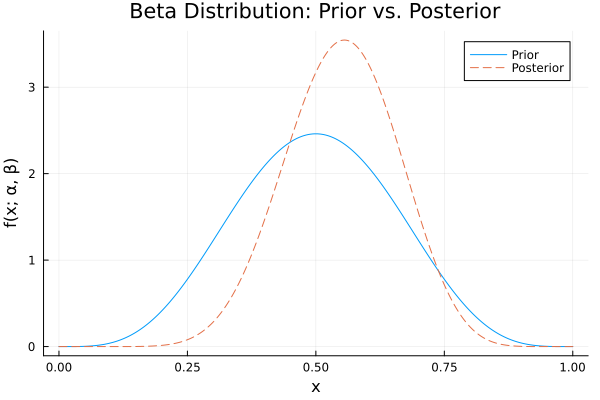

In [9]:
using SpecialFunctions, Plots

function pdf_beta(alpha, beta, x)
    if x < 0 || x > 1
        return 0.0  # The beta distribution is only defined for 0 <= x <= 1
    end
    coeff = gamma(alpha + beta) / (gamma(alpha) * gamma(beta))
    return coeff * x^(alpha - 1) * (1 - x)^(beta - 1)
end

# Create x from 0 to 1 with increment of 0.001
x = 0:0.001:1

# Define prior alpha and beta
alpha_prior = 5
beta_prior = 5

# Compute the pdf values for prior
y_prior = [pdf_beta(alpha_prior, beta_prior, xi) for xi in x]

# Given experiment results: 6 heads in 10 trials
heads = 6
trials = 10

# Update alpha and beta for posterior
alpha_posterior = alpha_prior + heads
beta_posterior = beta_prior + (trials - heads)

# Compute the pdf values for posterior
y_posterior = [pdf_beta(alpha_posterior, beta_posterior, xi) for xi in x]

# Plot prior and posterior distributions
plot(x, y_prior, label="Prior", title="Beta Distribution: Prior vs. Posterior", xlabel="x", ylabel="f(x; α, β)")
plot!(x, y_posterior, label="Posterior", linestyle=:dash)

The posterior distribution shifts to reflect the observed results, with the peak moving toward the higher probability of heads while the variance decreases.

# Question 2
### (LSQFIT) Complete the exercises 



### 2.1 


The exponential model is given by: 
$$
f(x) = 3* e^x
$$

where x is defined as the range 0:0.1:1, and y is the experiment data with a measurement error with a standard deviation of 0.2. Follow the notebook LSQFIT_class.ipynb and use it as a template to
1) Scatter plot of x vs. experiment data with fitted model (using a initial guess of the parameters of your chosing).
2) Calculate the covariance matrix from the Hessian of Chi-square.











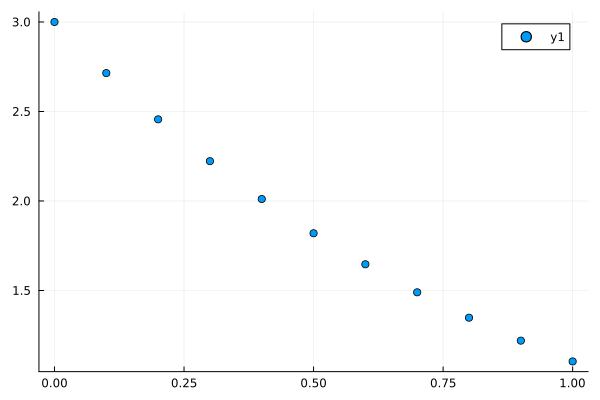

In [64]:
using Plots, Random, ForwardDiff, NonlinearSolve, LsqFit, Statistics 
x = collect(0:0.1:1)
y = 3 .* exp.(-x)
scatter(x,y)

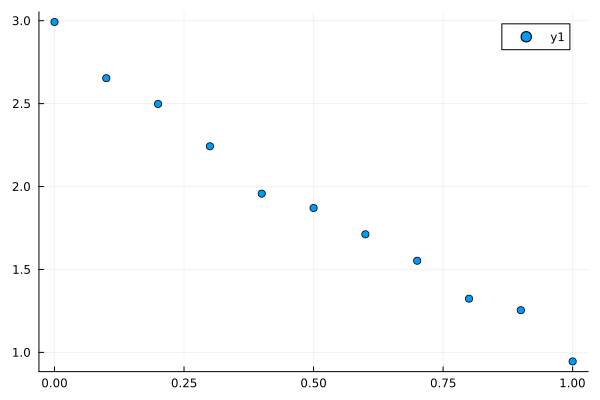

In [65]:
y_exp = y + 0.1*randn(length(y))
scatter(x,y_exp)

In [66]:
model(x,p) = p[1] .* exp.(-p[2] .* x)
fit = curve_fit(model, x, y_exp, [1.5,1.5])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([3.0000960553122487, 1.0015330895378642], [0.007815453727102906, 0.06075868248290739, -0.04246125661930966, -0.021239336130804976, 0.05256466590314268, -0.05235281517435819, -0.06708999923720871, -0.06436270562189539, 0.02255219224579763, -0.036207017702786226, 0.15655609443837992], [1.0000000000075278 0.0; 0.9046987089910705 -0.2714183028187872; … ; 0.4060090696558102 -1.0962595874594712; 0.3673158811521589 -1.1019829261096943], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [67]:
fit.param

2-element Vector{Float64}:
 3.0000960553122487
 1.0015330895378642

In [68]:
cov = estimate_covar(fit)

2×2 Matrix{Float64}:
 0.00236307  0.00138818
 0.00138818  0.00147196

In [69]:
sqrt(estimate_covar(fit))

2×2 Matrix{Float64}:
 0.0453702  0.0174533
 0.0174533  0.0341664

In [70]:
function res(u, (x,y))
    return u[1] .* exp.( -u[2] .* x) .- y
end

res (generic function with 1 method)

In [71]:
res([1.5,1.5],(x,y_exp))

11-element Vector{Float64}:
 -1.4922806015851457
 -1.362362380969473
 -1.3867518070749947
 -1.2863009659758304
 -1.1340095516534543
 -1.1620589167885411
 -1.1022093027690745
 -1.027661748935441
 -0.8720342355160393
 -0.8654128350197425
 -0.6107315914406887

In [72]:
prob = NonlinearLeastSquaresProblem(res, [1.5,2.0], (x,y_exp))

NonlinearLeastSquaresProblem with uType Vector{Float64}. In-place: false
u0: 2-element Vector{Float64}:
 1.5
 2.0

In [73]:
sol = solve(prob, GaussNewton(); maxiters =1000)

retcode: Stalled
u: 2-element Vector{Float64}:
 3.0000960545023974
 1.0015330886790987

In [74]:
function chi2(u,(x,y))
    sum(res(u,(x,y)) .^2 ./ 0.1^2)
end

chi2 (generic function with 1 method)

In [75]:
chi2(sol.u,(x,y_exp))

4.6483613969616595

In [76]:
ourchi2(u) = chi2(u,(x,y_exp))

ourchi2 (generic function with 1 method)

In [77]:
ourchi2(sol.u)

4.6483613969616595

In [78]:
h = ForwardDiff.hessian(ourchi2,sol.u)

2×2 Matrix{Float64}:
  980.133  -924.344
 -924.344  1584.68

In [79]:
sqrt.(inv(2*h))

2×2 Matrix{Float64}:
 0.0336732  0.0257177
 0.0257177  0.0264824

In [80]:
function lsqfitting(fitfct, (x,y) , sigma, β0)
    res(β,(x,y)) = fitfct(x,β) .- y
    prob = NonlinearLeastSquaresProblem(res, β0, (x,y))
    sol = solve(prob, GaussNewton(); maxiters =1000)
    chi2(β) = sum(abs2, res(β,(x,y)) ./ sigma)
    return sol.u, inv(2*ForwardDiff.hessian(chi2,sol.u))
end

lsqfitting (generic function with 1 method)

In [81]:
f(x,β) = β[1] .* exp.(-β[2] .* x)

f (generic function with 1 method)

In [82]:
bestbeta, covar = lsqfitting(f, (x,y_exp), 0.1, [1.5,1.5])

([3.000096055336926, 1.0015330895639947], [0.0011338871970013112 0.0006613987567756543; 0.0006613987567756543 0.000701317296611104])

In [83]:
sqrt.(covar)

2×2 Matrix{Float64}:
 0.0336732  0.0257177
 0.0257177  0.0264824

### 2.2 
Similar to  2.1, repeat the procedure 500 times and calculate the standard deviation of the fitted parameters.  Then compare this standard deviation to the standard deviations that you estimated from the covariance matrix from each fit (you have to think a little about how you average the covariance matrix - give a rationale).

In [85]:
using Plots, Random, ForwardDiff, NonlinearSolve, LsqFit, Statistics

# Define x values
x = collect(0:0.1:1)

# True model (without noise)
true_params = [3.0, 1.0]
y_true = true_params[1] .* exp.(-true_params[2] .* x)

# Number of trials
num_trials = 500

# Storage for estimated parameters and covariance matrices
estimated_params = zeros(num_trials, 2)
cov_matrices = zeros(num_trials, 2, 2)

# Function for nonlinear least squares fitting
function lsqfitting(fitfct, (x, y), sigma, β0)
    res(β, (x, y)) = fitfct(x, β) .- y
    prob = NonlinearLeastSquaresProblem(res, β0, (x, y))
    sol = solve(prob, GaussNewton(); maxiters=1000)
    chi2(β) = sum(abs2, res(β, (x, y)) ./ sigma)
    return sol.u, inv(2 * ForwardDiff.hessian(chi2, sol.u))
end

# Define the model function
f(x, β) = β[1] .* exp.(-β[2] .* x)

# Perform 500 trials
for i in 1:num_trials
    y_noisy = y_true + 0.1 * randn(length(y_true))  # Add measurement noise
    bestbeta, covar = lsqfitting(f, (x, y_noisy), 0.1, [1.5, 1.5])
    
    estimated_params[i, :] .= bestbeta
    cov_matrices[i, :, :] .= covar
end

# Compute empirical standard deviation of the estimated parameters
std_empirical = std(estimated_params, dims=1)[:]

# Compute average covariance matrix and extract standard deviations
mean_cov_matrix = mean(cov_matrices, dims=1)[1, :, :]
std_from_cov = sqrt.(mean_cov_matrix)

# Display results
println("Empirical standard deviations from 500 trials: ", std_empirical)
println("Standard deviations from the averaged covariance matrix: ", std_from_cov)


Empirical standard deviations from 500 trials: [0.06615908303193214, 0.051983631910385776]
Standard deviations from the averaged covariance matrix: [0.03381004092608359 0.02590368693100208; 0.02590368693100208 0.026653014783384686]


Each time the model is fitted, a different covariance matrix is obtained. This represents the uncertainty in the estimated parameters for that specific dataset. These matrices also differ due to extra variance from the noise.

If the standard deviations from the averaged covariance matrix match the empirical standard deviations, this model and fitting procedure correctly capture parameter uncertainty. If not, it could indicate discrepancies such as incorrect noise assumptions.

Keeping this in mind, I computed the empirical standard deviation of the parameters, followed by average covariance matrices. This should give us around half of the empirical because of the square root.